In [28]:
from __future__ import print_function
__author__ = "Baoling Zhou, CUSP NYU 2017"
import numpy as np
import matplotlib.pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [29]:
#GENERATE 100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions 
#(500 samples in total), all with the same population mean
#Include a Normal, a Poisson, a Binomial, a Chi-Squared distribution, and 1 more of your choice.
np.random.seed(56)
N = np.random.uniform(low=10, high=2000, size=(100,))
N = N.astype(int)
N.tolist()
N

array([1968,  673, 1350,  400,  715, 1628,  503,  922, 1755,  789,  659,
        189, 1670,  201, 1298, 1103, 1700,  537,  887, 1762, 1475, 1428,
         80,   49,  662, 1130, 1493, 1461, 1980, 1927, 1104, 1976, 1023,
        706, 1863,  416,  808,  949,  284, 1453, 1175,  321, 1574,  339,
       1491,  525, 1506,  266,   60,  361, 1935,  571, 1654,  750,  943,
        384,  313,   13,  922,   87, 1469, 1361,  300, 1075, 1924, 1478,
       1873,  661, 1698, 1747,  309,   44,  875,  812,  674,   80,  451,
        735, 1060, 1510, 1387,  229, 1977, 1877, 1006, 1368,  979,  454,
        803, 1023, 1933,  421, 1036, 1148, 1775, 1383,  889, 1450,  131,
         75])

In [30]:
#normal_mean = []
#for i in range(100):
#    normal_mean.append(np.random.normal(loc=10,size = round(N[i])).mean())

In [31]:
#plt.hist(normal_mean);

In [32]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
import seaborn
from scipy.optimize import curve_fit, minimize
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [33]:
mymean = 100

In [34]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

In [35]:
md = {}
# md is an empty disctionary
md['chisq'] = np.random.chisquare(df, size=100)
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 101.82, standard deviation: 14.34


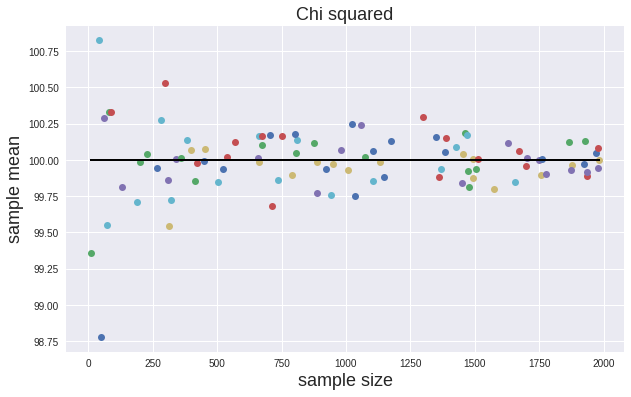

In [36]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable
np.random.seed(56)
for n in N:
    md['chisq'][n] = np.random.normal(loc=mymean,scale=5, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        axchisq_mu_n.plot([min(N), max(N)], [df, df], 'k')

In [37]:
md['lnorm'] = np.random.normal(loc=mymean,scale=5, size=100)

In [38]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

Normal mean: 101.55, standard deviation: 4.70


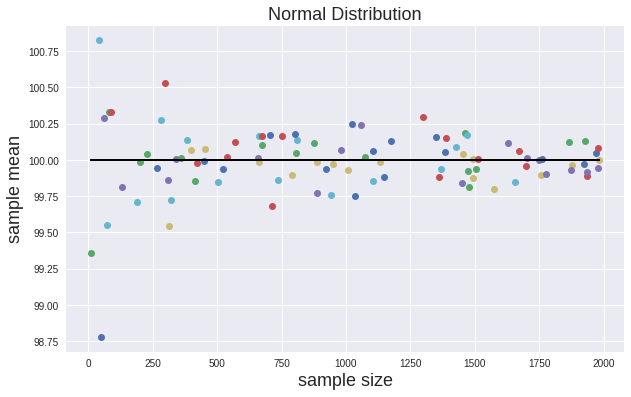

In [39]:
md['lnorm'] = {} 

#and do it in a for loop.
np.random.seed(56)
for n in N:
    md['lnorm'][n] = np.random.normal(loc = mymean,scale = 5, size = n)
    
# save the means for plotting later    

md['lnorm']['means'] = {}
axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
    if not type(nn) == str:
        md['lnorm']['means'][nn] = md['lnorm'][nn].mean()
        #and plot it
        axlnorm_mu_n.plot(nn, md['lnorm']['means'][nn], 'o')
        axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axlnorm_mu_n.set_title('Normal Distribution', fontsize=18)
        axlnorm_mu_n.plot([min(N), max(N)], [mymean, mymean], 'k')

In [40]:
md['pois'] = np.random.poisson(mymean, 100)

In [41]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 99.25, standard deviation: 9.96


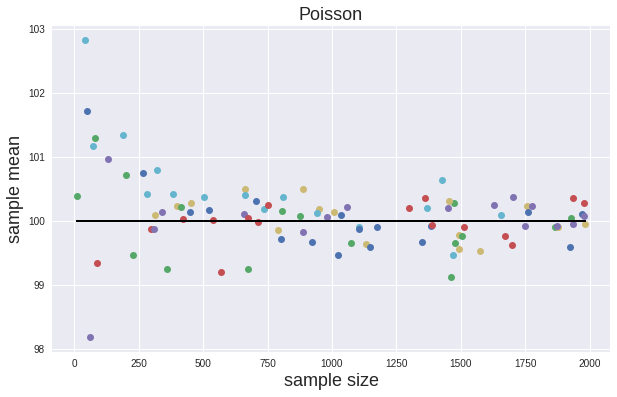

In [42]:
md['pois'] = {} 

#and do it in a for loop. not pythonic, but easily readable
np.random.seed(56)
for n in N:
    md['pois'][n] = np.random.poisson(mymean, size = n)
    
# save the means for plotting later    

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        #and plot it
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(N), max(N)], [mymean, mymean], 'k')

In [43]:
md['binomial'] = np.random.binomial(n = 200, p = 0.5, size= 100)

In [44]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 99.63, standard deviation: 7.43


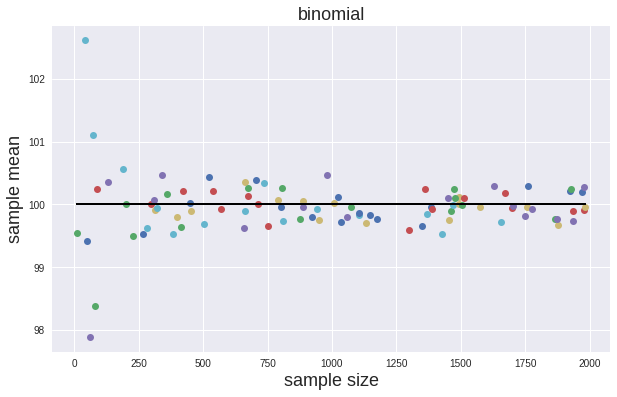

In [45]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['binomial'] = {} 
np.random.seed(56)
# mean = n * p

for n in N:
    md['binomial'][n] = np.random.binomial(200, 0.5, size= n)
    
# save the means for plotting later    

md['binomial']['means'] = {}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        #and plot it
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('binomial', fontsize=18)
        axbinomial_mu_n.plot([min(N), max(N)], [100, 100], 'k')

In [46]:
md['nbinomial'] = np.random.negative_binomial(100,p = 0.5, size = 100)

In [47]:
print ("negative_binomial mean: %.2f, standard deviation: %.2f"%(md['nbinomial'].mean(), md['nbinomial'].std()))

negative_binomial mean: 100.66, standard deviation: 14.27


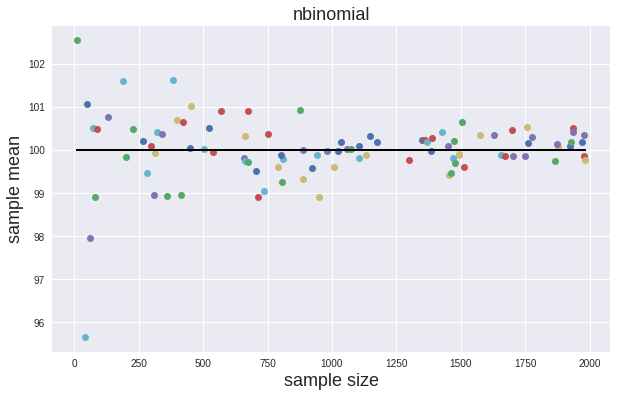

In [48]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['nbinomial'] = {} 
np.random.seed(56)
#and do it in a for loop.

for n in N:
    md['nbinomial'][n] = np.random.negative_binomial(n = 100, p = 0.5, size= n)
    
# save the means for plotting later    

md['nbinomial']['means'] = {}
axnbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['nbinomial']:
    if not type(nn) == str:
        md['nbinomial']['means'][nn] = md['nbinomial'][nn].mean()
        #and plot it
        axnbinomial_mu_n.plot(nn, md['nbinomial']['means'][nn], 'o')
        axnbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axnbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axnbinomial_mu_n.set_title('nbinomial', fontsize=18)
        axnbinomial_mu_n.plot([min(N), max(N)], [100, 100], 'k')

In [49]:
md.keys()

['pois', 'chisq', 'nbinomial', 'lnorm', 'binomial']

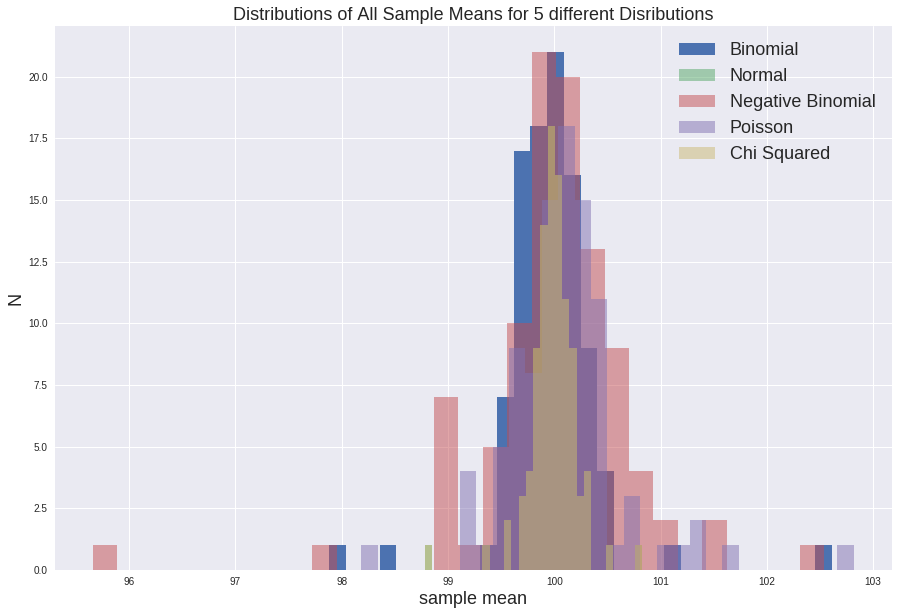

In [50]:
##PLOT the distributions of all sample means (together for all distributions).
binomial_means = list(md['binomial']['means'].values())
lnorm_means = list(md['lnorm']['means'].values())
nBinomial_means = list(md['nbinomial']['means'].values())
pois_means = list(md['pois']['means'].values())
chisq_means = list(md['chisq']['means'].values())

pl.figure(figsize=(15, 10))

pl.hist(binomial_means,bins=30,label = 'Binomial')
pl.hist(lnorm_means,bins=30, alpha = 0.5, label = 'Normal')
pl.hist(nBinomial_means,bins=30, alpha = 0.5, label = 'Negative Binomial')
pl.hist(pois_means,bins=30, alpha = 0.5, label = 'Poisson')
pl.hist(chisq_means,bins=30, alpha = 0.5, label = 'Chi Squared')

pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distributions of All Sample Means for 5 different Disributions', fontsize = 18)

pl.legend(fontsize = 18)

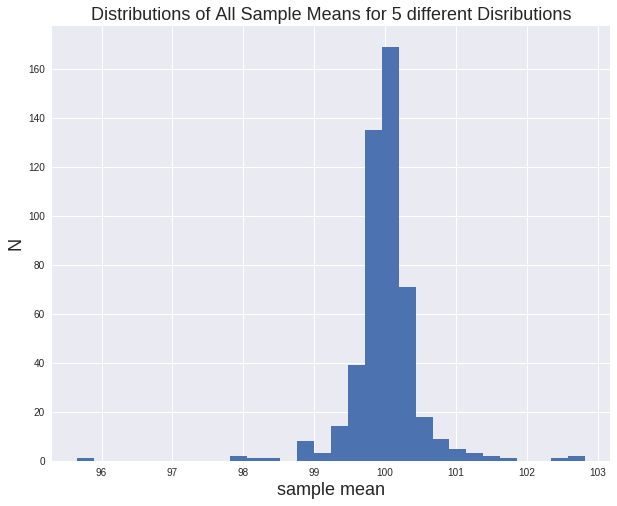

In [51]:
##this code could only work under Python2
allmeans = list(md['binomial']['means'].values() + md['lnorm']['means'].values() + md['chisq']['means'].values() + md['nbinomial']['means'].values() + md['pois']['means'].values())

pl.figure(figsize=(10, 8))
pl.hist(allmeans,bins=30,label = 'All Distributions')
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Distributions of All Sample Means for 5 different Disributions', fontsize = 18)


Q: Describe the behavior you see in the plots in terms of the law of large numbers.

A: The larger the sample size is, the closer the sample mean is to the population mean.

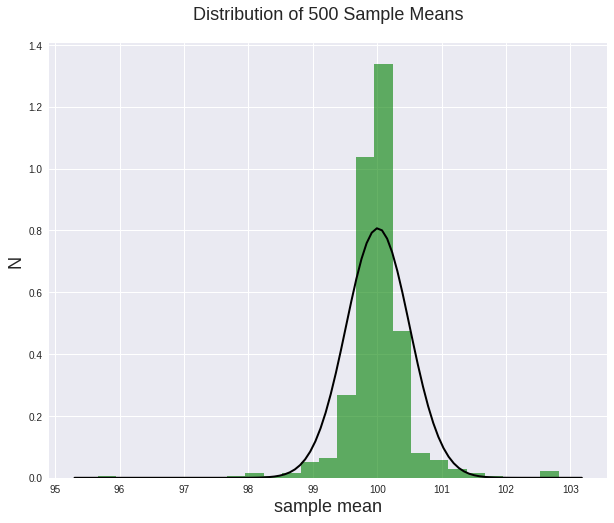

In [57]:
from scipy.stats import norm

mu, std = norm.fit(allmeans)

# Plot the histogram.
pl.figure(figsize=(10, 8))
plt.hist(allmeans, bins=25, normed=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Distribution of 500 Sample Means', fontsize=18, y=1.04)# Plot the histogram.
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)